In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    # First convolutional layer
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),

    # Second convolutional layer
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    # Third convolutional layer
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    # Flatten and Dense layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [2]:
# Step 1: Import libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Step 2: Load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Step 3: Normalize pixel values to range 0-1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Step 4: One-hot encode labels
y_train = to_categorical(y_train.reshape(-1), num_classes=10)
y_test = to_categorical(y_test.reshape(-1), num_classes=10)


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Print dataset shapes
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Number of classes:", len(np.unique(y_train)))


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Number of classes: 10


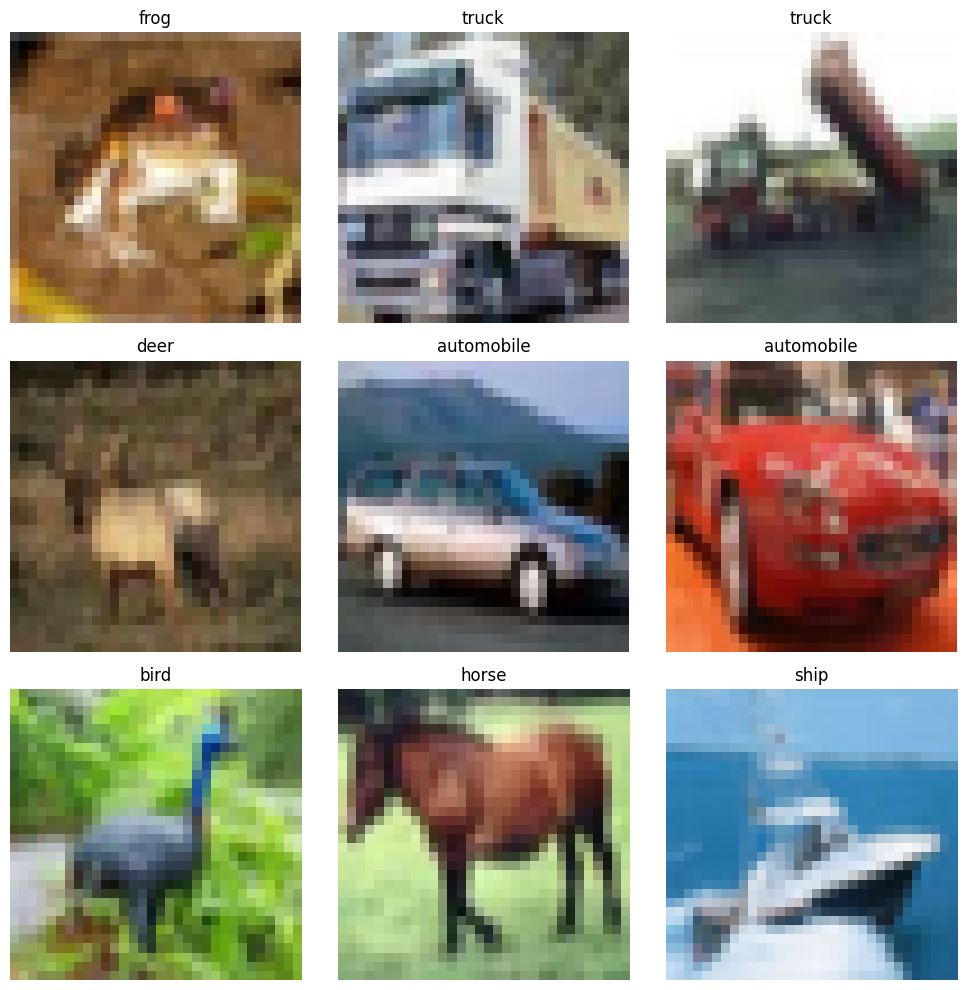

In [2]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Display 9 sample images from the training set
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()



In [3]:
# Normalize pixel values to range 0-1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode labels
from tensorflow.keras.utils import to_categorical

# The original shape of labels is (num_samples, 1), so we need to flatten to (num_samples,)
# before applying to_categorical
y_train = to_categorical(y_train.reshape(-1), num_classes=10)
y_test = to_categorical(y_test.reshape(-1), num_classes=10)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    # First convolutional layer
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),

    # Second convolutional layer
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    # Third convolutional layer
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    # Flatten and Dense layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])



In [10]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



In [12]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize image data
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Properly one-hot encode labels
y_train = to_categorical(y_train.reshape(-1), num_classes=10)
y_test = to_categorical(y_test.reshape(-1), num_classes=10)

# Check shapes
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


X_train: (50000, 32, 32, 3)
y_train: (50000, 10)
X_test: (10000, 32, 32, 3)
y_test: (10000, 10)


In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 96ms/step - accuracy: 0.2874 - loss: 1.9104 - val_accuracy: 0.5237 - val_loss: 1.3281
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 95ms/step - accuracy: 0.5124 - loss: 1.3542 - val_accuracy: 0.5769 - val_loss: 1.1787
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 93ms/step - accuracy: 0.5847 - loss: 1.1680 - val_accuracy: 0.6323 - val_loss: 1.0300
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 94ms/step - accuracy: 0.6333 - loss: 1.0556 - val_accuracy: 0.6532 - val_loss: 0.9746
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 91ms/step - accuracy: 0.6599 - loss: 0.9716 - val_accuracy: 0.6578 - val_loss: 0.9837
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 90ms/step - accuracy: 0.6871 - loss: 0.9036 - val_accuracy: 0.6891 - val_loss: 0.8777
Epoch 7/10
595/782 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.7074 - loss: 0.8343

In [14]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Test Accuracy: 0.7213
Test Loss: 0.8212


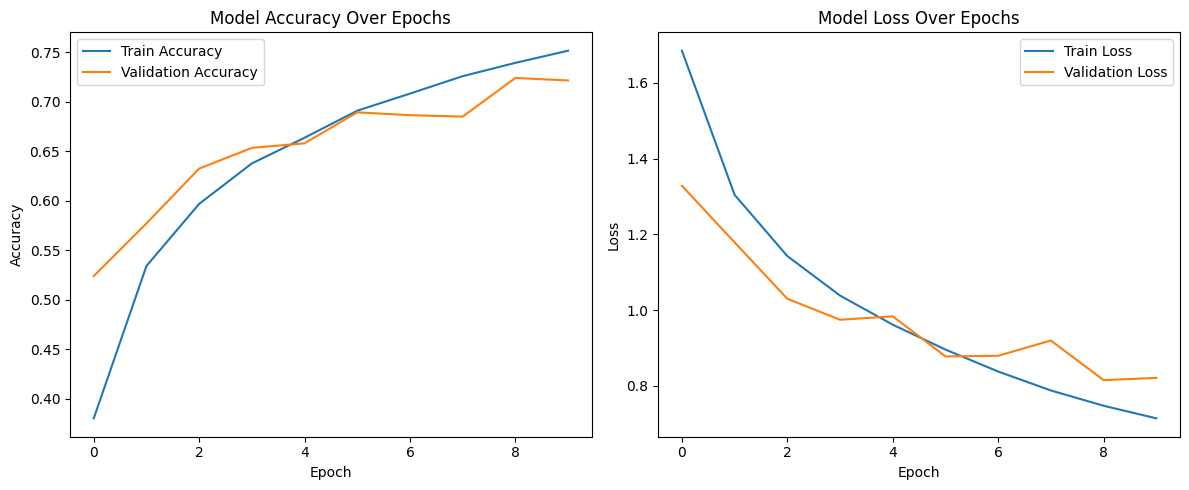

In [15]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
